In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [16]:
df = pd.read_csv("data/data_merge.csv")



df['new_date'] =df["recence"].apply(lambda x: pd.to_datetime('22/10/2018',dayfirst=True) - pd.Timedelta(days=x))

In [19]:
df_debut = df.loc[df["new_date"] <= pd.to_datetime('1/03/2018',dayfirst=True)]
df_debut_2mois = df.loc[(df["new_date"] <= pd.to_datetime('1/05/2018',dayfirst=True)) & (df["new_date"] > pd.to_datetime('1/03/2018',dayfirst=True))]
df_debut_4mois = df.loc[(df["new_date"] <= pd.to_datetime('1/07/2018',dayfirst=True)) & (df["new_date"] > pd.to_datetime('1/03/2018',dayfirst=True))]
df_debut_6mois = df.loc[(df["new_date"] <= pd.to_datetime('1/09/2018',dayfirst=True)) & (df["new_date"] > pd.to_datetime('1/03/2018',dayfirst=True))]
df_debut_8mois = df.loc[(df["new_date"] <= pd.to_datetime('1/11/2018',dayfirst=True)) & (df["new_date"] > pd.to_datetime('1/03/2018',dayfirst=True))]


for dataframe in [df,df_debut,df_debut_2mois,df_debut_4mois,df_debut_6mois,df_debut_8mois]:
    dataframe.drop("new_date",axis=1,inplace=True)

/tmp/ipykernel_28774/2362626596.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.drop("new_date",axis=1,inplace=True)
/tmp/ipykernel_28774/2362626596.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.drop("new_date",axis=1,inplace=True)
/tmp/ipykernel_28774/2362626596.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.drop("new_date",axis=1,inplace=True)
/tmp/ipykernel_28774/2362626596.py:9: SettingW

In [22]:

num_columns = [col for col in df.columns if df[col].dtype != "object"]
cat_columns = [col for col in df.columns if df[col].dtype == "object"]

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

std = StandardScaler()
ohe= OneHotEncoder(sparse_output=False)

log_1p = FunctionTransformer(func=np.log1p)
preprocessor_pca = ColumnTransformer(
    transformers=[
        ("ohe",ohe,cat_columns),
        ("log",log_1p,num_columns)
    ]
    
)
tsne=Pipeline([
     ('preprocessor', preprocessor_pca),
     ('std', std ),
     ("tsne", TSNE(n_components=3,random_state=42,verbose=2,n_jobs=-1))
])

tsne_value_debut = tsne.fit_transform(df_debut)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 55215 samples in 0.001s...
[t-SNE] Computed neighbors for 55215 samples in 5.504s...
[t-SNE] Computed conditional probabilities for sample 1000 / 55215
[t-SNE] Computed conditional probabilities for sample 2000 / 55215
[t-SNE] Computed conditional probabilities for sample 3000 / 55215
[t-SNE] Computed conditional probabilities for sample 4000 / 55215
[t-SNE] Computed conditional probabilities for sample 5000 / 55215
[t-SNE] Computed conditional probabilities for sample 6000 / 55215
[t-SNE] Computed conditional probabilities for sample 7000 / 55215
[t-SNE] Computed conditional probabilities for sample 8000 / 55215
[t-SNE] Computed conditional probabilities for sample 9000 / 55215
[t-SNE] Computed conditional probabilities for sample 10000 / 55215
[t-SNE] Computed conditional probabilities for sample 11000 / 55215
[t-SNE] Computed conditional probabilities for sample 12000 / 55215
[t-SNE] Computed conditional probabilities for sam

In [24]:
# import pickle
# # pickle_out = open("tsne.pkl", "wb") 
# # pickle.dump(tsne_value, pickle_out) 
# # pickle_out.close()
# pickle_in = open('tsne.pkl', 'rb') 
# tsne_value = pickle.load(pickle_in)

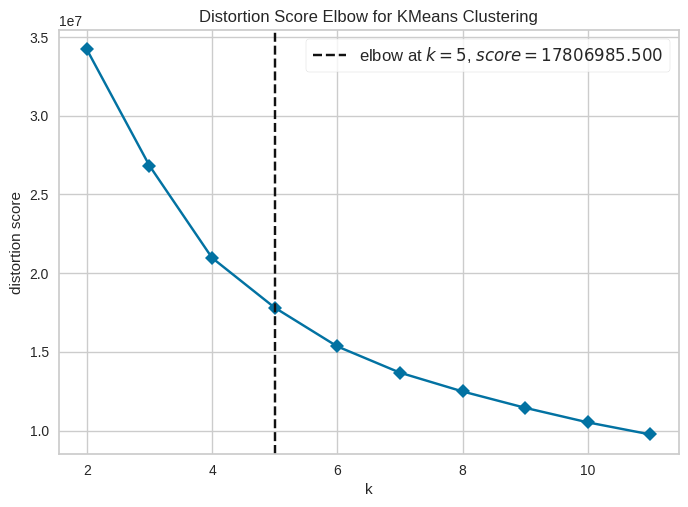

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(n_init=10,random_state=42),metric="distortion", k=(2,12),timings=False)

visualizer.fit(tsne_value_debut)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [27]:
kmeans = KMeans(n_clusters=5,n_init=10,random_state=42)
kmeans.fit(tsne_value_debut)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [28]:
df_debut["label"]=kmeans.labels_

/tmp/ipykernel_28774/1551135478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debut["label"]=kmeans.labels_


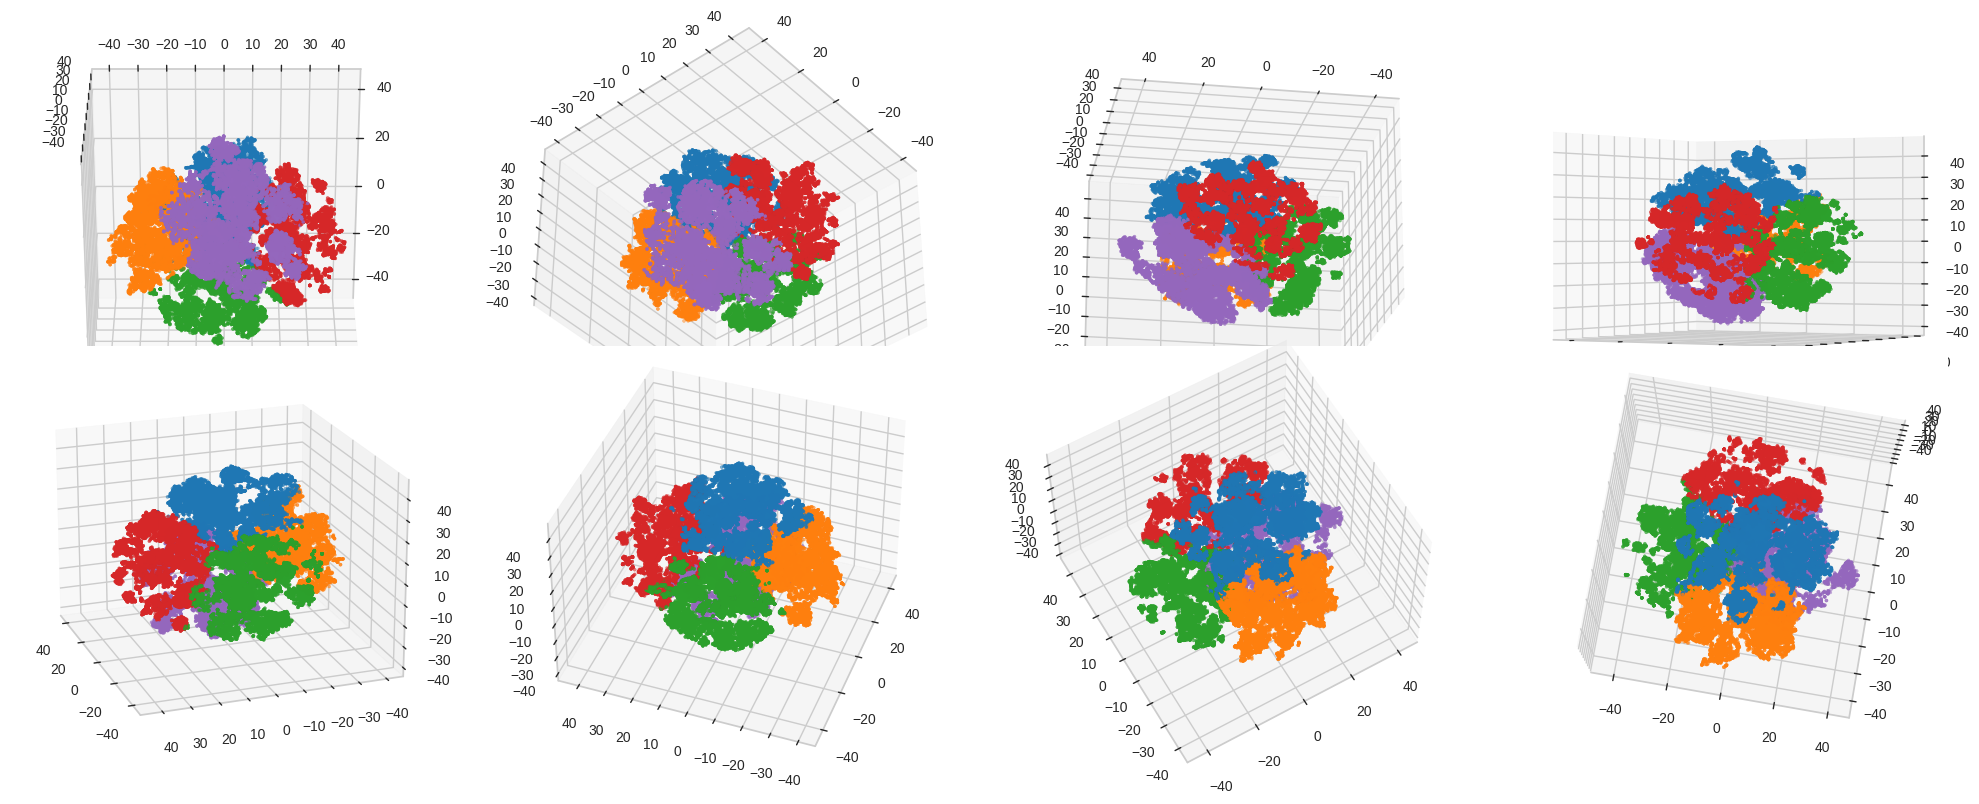

In [30]:
%matplotlib inline
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Create figure and axes
fig = plt.figure()
fig.set_size_inches(25, 15)
ax = []
for i in range(8):
    if i<4:
        ax.append(fig.add_subplot(1, 4, i+1, projection='3d'))
    else:
        ax.append(fig.add_subplot(2, 4, i+1, projection='3d'))

# Create a list of colors from the Matplotlib "Set1" palette
set1_colors = list(mcolors.TABLEAU_COLORS.values())[:10]

# Create a dictionary to map colors to values from the list
color_dict = {i: set1_colors[i] for i in range(len(set1_colors))}


# Plot the 3D scatter plot from different angles

for i in range(8):
    ax[i].scatter3D(tsne_value_debut[:,0],tsne_value_debut[:,1],tsne_value_debut[:,2],marker=".",c=[color_dict[i] for i in df_debut["label"]])
    ax[i].view_init(elev=i*20-60., azim=i*40)
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 68449 samples in 0.002s...
[t-SNE] Computed neighbors for 68449 samples in 6.722s...
[t-SNE] Computed conditional probabilities for sample 1000 / 68449
[t-SNE] Computed conditional probabilities for sample 2000 / 68449
[t-SNE] Computed conditional probabilities for sample 3000 / 68449
[t-SNE] Computed conditional probabilities for sample 4000 / 68449
[t-SNE] Computed conditional probabilities for sample 5000 / 68449
[t-SNE] Computed conditional probabilities for sample 6000 / 68449
[t-SNE] Computed conditional probabilities for sample 7000 / 68449
[t-SNE] Computed conditional probabilities for sample 8000 / 68449
[t-SNE] Computed conditional probabilities for sample 9000 / 68449
[t-SNE] Computed conditional probabilities for sample 10000 / 68449
[t-SNE] Computed conditional probabilities for sample 11000 / 68449
[t-SNE] Computed conditional probabilities for sample 12000 / 68449
[t-SNE] Computed conditional probabilities for sam

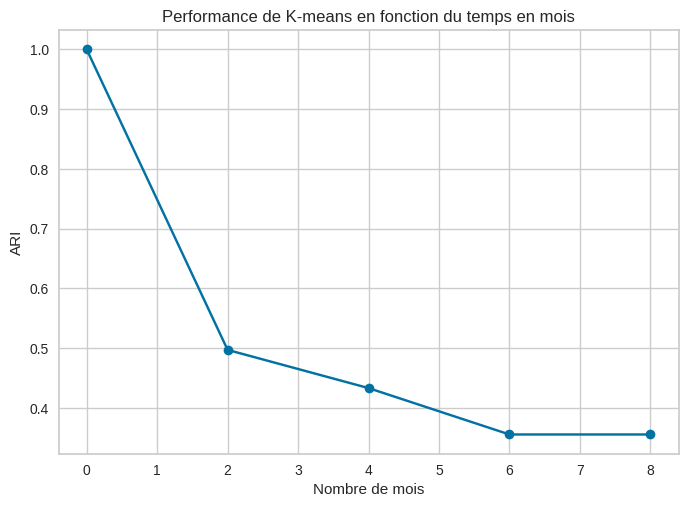

In [33]:
from sklearn.metrics import adjusted_rand_score

ari_scores = []
nb_mois = 0

kmeans = KMeans(n_clusters=5,n_init=10,random_state=42)
y_pred = kmeans.fit_predict(tsne_value_debut)
ari = adjusted_rand_score(df_debut["label"], y_pred[0:len(df_debut)])
ari_scores.append(ari)

for dataframe in [df_debut_2mois,df_debut_4mois,df_debut_6mois,df_debut_8mois]:
    kmeans = KMeans(n_clusters=5,n_init=10,random_state=42)
    y_pred = kmeans.fit_predict(tsne.fit_transform(pd.concat([df_debut, dataframe], ignore_index=True)))
    ari = adjusted_rand_score(df_debut["label"], y_pred[0:len(df_debut)])
    ari_scores.append(ari)

# Afficher le graphique de l'ARI
plt.plot([0,2,4,6,8], ari_scores, '-o')
plt.xlabel('Nombre de mois')
plt.ylabel('ARI')
plt.title('Performance de K-means en fonction du temps en mois')
plt.show()